In [1]:
import numpy as np
import pandas as pd
from collections import Counter

In [2]:
def calculate_tfidf(docs):
    tf=[]
    for doc in docs:
        l=doc.split()
        d={term:l.count(term) for term in l}
        tf.append(d)
    
    idf={}
    for doc in tf:
        for term in doc:
            idf[term]=idf.get(term,0)+1
    idf={term:np.log(len(docs)/freq) for term,freq in idf.items()}
    
    tfidf=[]
    for doc in tf:
        d={}
        for term,tfval in doc.items():
            d[term]=tfval*idf[term]
        tfidf.append(d)
    return tfidf

In [3]:
def tfidf_to_vector(tfidf,vocabulary):
    vector=[]
    for doc in tfidf:
        vector.append([doc.get(term,0) for term in vocabulary])
    return vector

In [4]:
df = pd.read_csv("Musical_instruments_reviews.csv")
x=df.iloc[:,4].values
y=df.iloc[:,5].values

In [5]:
for i in range(len(y)):
    if(y[i]==4 or y[i]==5):
        y[i]=1
    elif(y[i]==3):
        y[i]=0
    else:
        y[i]=-1

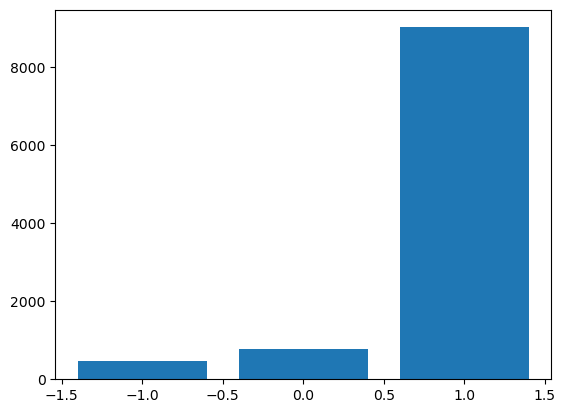

In [6]:
import matplotlib.pyplot as plt
x0=[-1,0,1]
y2=list(y)
y0=[y2.count(-1),y2.count(0),y2.count(1)]
plt.bar(x0,y0)
plt.show()

In [7]:
print(y2.count(-1),y2.count(0),y2.count(1),len(x),len(y))

467 772 9022 10261 10261


In [8]:
x2=[]
y2=[]
c={}
c[-1]=0
c[0]=0
c[1]=0
for z in range(len(x)):
    if(c[y[z]]<=467):
        x2.append(x[z])
        c[y[z]]+=1
        y2.append(y[z])

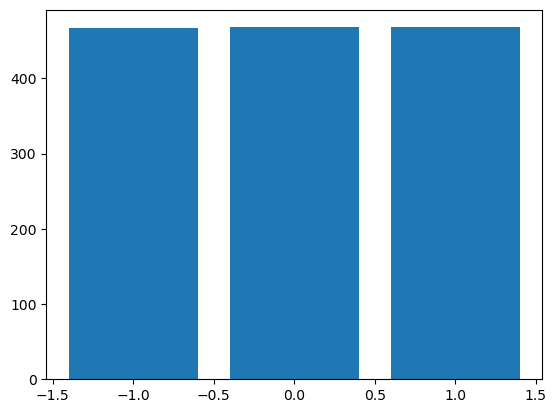

In [9]:
x0=[-1,0,1]
y0=[y2.count(-1),y2.count(0),y2.count(1)]
plt.bar(x0,y0)
plt.show()

In [10]:
x=x2
y=y2
print(len(x),len(y))

1403 1403


In [11]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1,stratify=y)

In [12]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
stop_words=set(stopwords.words('english'))
vocabulary=set(word for sentence in x_train for word in word_tokenize(sentence) if word not in stop_words and len(word)>1 and word[0].isalpha())

In [13]:
xtrain_tfidf=calculate_tfidf(x_train)
xtest_tfidf=calculate_tfidf(x_test)

In [14]:
xtrain_vector=tfidf_to_vector(xtrain_tfidf,vocabulary)
xtest_vector=tfidf_to_vector(xtest_tfidf,vocabulary)

In [15]:
voc_score={}
for i in vocabulary:
    for j in xtrain_tfidf:
        if i not in voc_score:
            voc_score[i]=j.get(i,0)
        else:
            voc_score[i]=max(voc_score[i],j.get(i,0))

In [16]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression(max_iter=1000)
model.fit(xtrain_vector,y_train)

LogisticRegression(max_iter=1000)

In [17]:
y_pred=model.predict(xtest_vector)
print(len(voc_score))
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_pred))

9402
0.608540925266904


In [18]:
review="This is a good keyboard but it broke soon"
l=[[]]
for i in voc_score:
    if(i in review):
        l[0].append(voc_score[i])
    else:
        l[0].append(0)
#review_tfidf=calculate_tfidf(review)
#review_vector=tfidf_to_vector(review_tfidf,vocabulary)
res=model.predict(l)
print(res[0])

-1.0


In [19]:
review="Great little cord"
l=[[]]
for i in voc_score:
    if(i in review):
        l[0].append(voc_score[i])
    else:
        l[0].append(0)
#review_tfidf=calculate_tfidf(review)
#review_vector=tfidf_to_vector(review_tfidf,vocabulary)
res=model.predict(l)
print(res[0])

0.0


In [20]:
review="Does the job. What more do you need"
l=[[]]
for i in voc_score:
    if(i in review):
        l[0].append(voc_score[i])
    else:
        l[0].append(0)
#review_tfidf=calculate_tfidf(review)
#review_vector=tfidf_to_vector(review_tfidf,vocabulary)
res=model.predict(l)
print(res[0])

1.0
